In [3]:
# Problem 1
from numpy import *
import numpy as np

print ("Random matrix A")
A = np.random.randn(5,5)
print (A)

# Problem 1a
max_arr = []
min_arr = []

for i in range(0,5):
    min_arr.append(min(A[:,i]))
    max_arr.append(max(A[:,i]))


NewMax = 1
NewMin = -1
NewRange = (NewMax - NewMin)  
A_scale = np.empty(shape=[5, 5])

for i in range(5):
	for j in range(5):
		OldRange = (max_arr[j] - min_arr[j])

		if (OldRange == 0):
		    NewValue = NewMin
		else:
			A_scale[i,j] = ((A[i,j] - min_arr[j]) / OldRange) * NewRange + NewMin
		

print ("\nA scaled in range (-1,1)")
print (A_scale)

# Problem 1b
print ("\nA standardize")
A_standard = np.empty(shape=[5, 5])
for i in range(5):
	for j in range(5):
		A_standard[i,j] = (A_scale[i,j] - mean(A_scale[:,j], axis=0)) / std(A_scale[:,j], axis=0)


print (A_standard)

Random matrix A
[[ -6.18564091e-01  -1.02510615e-01  -5.52798151e-01   2.59975852e+00
   -1.18923826e+00]
 [  9.86881703e-02   3.28540441e-01  -5.70067710e-01   3.35540838e-01
    1.22702796e-03]
 [ -3.38988572e-01   3.84641361e-01  -2.50691948e+00  -7.39311362e-01
   -8.04559038e-01]
 [  7.89158045e-02   3.32853792e-01   2.02527786e-02   7.79435620e-01
   -1.46102663e-01]
 [ -5.31993913e-01  -3.01750439e-01  -1.41278527e-01   1.62714687e-01
   -8.84806387e-01]]

A scaled in range (-1,1)
[[-1.         -0.41945745  0.54648843  1.         -1.        ]
 [ 1.          0.83653383  0.53282133 -0.35619664  1.        ]
 [-0.22042625  1.         -1.         -1.         -0.35373299]
 [ 0.94486636  0.84910202  1.         -0.09031734  0.75248385]
 [-0.75860605 -1.          0.87216439 -0.45971418 -0.48854977]]

A standardize
[[-1.18425467 -0.83104715  0.2173734   1.7880755  -1.28320803]
 [ 1.2005505   0.72060832  0.198353   -0.26482689  1.33014325]
 [-0.25468891  0.92255493 -1.93486234 -1.23936511 

Populating the interactive namespace from numpy and matplotlib


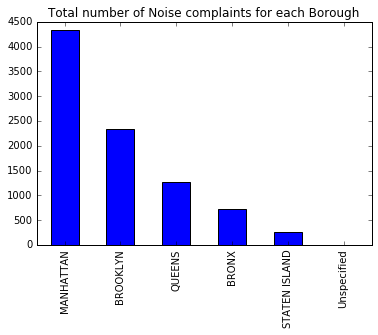

<class 'pandas.core.series.Series'>


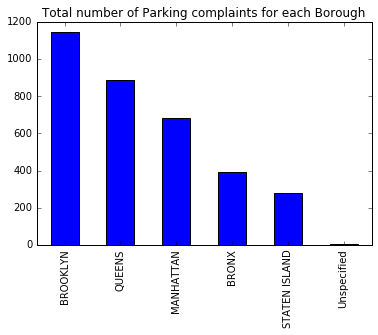

In [2]:
# Problem 2
import pandas as pd 
import matplotlib.pyplot as plt

DF = pd.read_csv("311-service-requests.csv",dtype=object)

%pylab inline

Complaint_Noise = DF[DF["Complaint Type"].str.contains("Noise")]

Noise = Complaint_Noise["Borough"].value_counts()
Noise.plot(kind="bar")
plt.title("Total number of Noise complaints for each Borough")
plt.show()

Complaint_Parking = DF[DF["Complaint Type"].str.contains("Parking")]
Parking = Complaint_Parking["Borough"].value_counts()
Parking.plot(kind="bar")
plt.title("Total number of Parking complaints for each Borough")
plt.show()


C:\Users\chocon\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


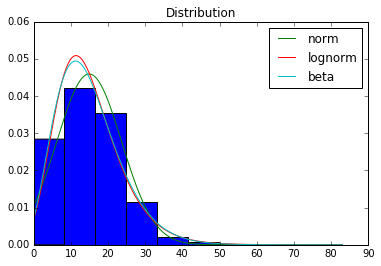

In [12]:
# Problem 3
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

DF = pd.read_csv("weather_2012.csv", parse_dates=['Date/Time'], date_parser=dateparse)

# print (DF)

DF.index = DF["Date/Time"]
# print(DF.index)

# Problem 3a
mean_by_month = []
month_name = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for i in range(12):
	month = DF[ ( DF.index.month == (i+1) )]
	mean_by_month.append(month["Temp (C)"].mean())

# Problem 3b
wind = DF["Wind Spd (km/h)"]
plt.hist(wind, bins=10, normed=True)

dist_names = ['norm', 'lognorm', 'beta']

X = np.linspace(wind.min(),wind.max(),500)

for dist_name in dist_names:
    dist = getattr(st, dist_name)
    param = dist.fit(wind)
    pdf_fitted = dist.pdf(X, *param[:-2], loc=param[len(param)-2], scale=param[len(param)-1])
    plt.plot(X, pdf_fitted, label=dist_name)
plt.legend(loc='upper right')
plt.title("Distribution")
plt.show()
